# Student Enrolment Analysis - Victoria Schools (Feb 2024)
This project analyzes Victorian schools' full-time equivalent (FTE) enrolment data from February 2024. The goal is to uncover patterns across education sectors, school types, year levels, and regions to better understand student distribution in Victoria.

In [7]:
import pandas as pd

# Load the CSV with correct encoding
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

# Preview
df.head()


,Education_Sector,Entity_Type,School_No,School_Name,School_Type,School_Status,DE_Admin_Region,LGA_Name,DE_Admin_AREA,"Prep Total""""",...,"Year 8 Total""""","Year 9 Total""""","Year 10 Total""""","Year 11 Total""""","Year 12 Total""""","Secondary Ungraded Total""""","Secondary Total""""","Grand Total""""",Year,CENSUS_TYPE
0,Catholic,2,20,Parade College,Secondary,O,NORTH-WESTERN VICTORIA,Banyule (C),North Eastern Melbourne,0.0,...,329.0,338.0,311.0,304.0,304.0,0.0,1946.0,1946.0,2024,F
1,Catholic,2,25,Simonds Catholic College,Secondary,O,SOUTH-WESTERN VICTORIA,Melbourne (C),Western Melbourne,0.0,...,71.0,64.0,82.0,65.0,66.0,0.0,400.0,400.0,2024,F
2,Catholic,2,26,St Marys College Melbourne,Secondary,O,SOUTH-EASTERN VICTORIA,Port Phillip (C),Bayside Peninsula,0.0,...,71.0,85.0,85.0,76.0,100.0,0.0,474.0,474.0,2024,F
3,Catholic,2,28,St Patrick's College Ballarat,Secondary,O,SOUTH-WESTERN VICTORIA,Ballarat (C),Central Highlands,0.0,...,220.0,243.0,233.0,200.0,184.0,0.0,1291.0,1291.0,2024,F
4,Catholic,2,29,St Patrick's School,Primary,O,SOUTH-WESTERN VICTORIA,Ballarat (C),Central Highlands,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,244.0,2024,F


## Exploratory Data Analysis


In [9]:
# Check the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295 entries, 0 to 2294
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Education_Sector            2295 non-null   object 
 1   Entity_Type                 2295 non-null   int64  
 2   School_No                   2295 non-null   int64  
 3   School_Name                 2295 non-null   object 
 4   School_Type                 2295 non-null   object 
 5   School_Status               2295 non-null   object 
 6   DE_Admin_Region             2295 non-null   object 
 7   LGA_Name                    2295 non-null   object 
 8   DE_Admin_AREA               2295 non-null   object 
 9   Prep Total""                2295 non-null   float64
 10  Year 1 Total""              2295 non-null   float64
 11  Year 2 Total""              2295 non-null   float64
 12  Year 3 Total""              2295 non-null   float64
 13  Year 4 Total""              2295 

### Basic Information
- The dataset has 2295 rows and 29 columns.
- There are no missing values in any column.
- Columns include categorical (object), numerical (float64), and integer (int64) types.
- Enrolment numbers from Prep to Year 12 are stored as float values.


In [11]:
# Remove extra quotes and spaces from column names
df.columns = df.columns.str.replace('"', '').str.strip()

# Check new column names
print(df.columns.tolist())


['Education_Sector', 'Entity_Type', 'School_No', 'School_Name', 'School_Type', 'School_Status', 'DE_Admin_Region', 'LGA_Name', 'DE_Admin_AREA', 'Prep Total', 'Year 1 Total', 'Year 2 Total', 'Year 3 Total', 'Year 4 Total', 'Year 5 Total', 'Year 6 Total', 'Primary Ungraded Total', 'Primary Total', 'Year 7 Total', 'Year 8 Total', 'Year 9 Total', 'Year 10 Total', 'Year 11 Total', 'Year 12 Total', 'Secondary Ungraded Total', 'Secondary Total', 'Grand Total', 'Year', 'CENSUS_TYPE']


### Cleaning Column Names
We removed extra quotation marks from column names for easier reference. Now the dataset is cleaner and more consistent to work with.

In [13]:
df.head()


,Education_Sector,Entity_Type,School_No,School_Name,School_Type,School_Status,DE_Admin_Region,LGA_Name,DE_Admin_AREA,Prep Total,...,Year 8 Total,Year 9 Total,Year 10 Total,Year 11 Total,Year 12 Total,Secondary Ungraded Total,Secondary Total,Grand Total,Year,CENSUS_TYPE
0,Catholic,2,20,Parade College,Secondary,O,NORTH-WESTERN VICTORIA,Banyule (C),North Eastern Melbourne,0.0,...,329.0,338.0,311.0,304.0,304.0,0.0,1946.0,1946.0,2024,F
1,Catholic,2,25,Simonds Catholic College,Secondary,O,SOUTH-WESTERN VICTORIA,Melbourne (C),Western Melbourne,0.0,...,71.0,64.0,82.0,65.0,66.0,0.0,400.0,400.0,2024,F
2,Catholic,2,26,St Marys College Melbourne,Secondary,O,SOUTH-EASTERN VICTORIA,Port Phillip (C),Bayside Peninsula,0.0,...,71.0,85.0,85.0,76.0,100.0,0.0,474.0,474.0,2024,F
3,Catholic,2,28,St Patrick's College Ballarat,Secondary,O,SOUTH-WESTERN VICTORIA,Ballarat (C),Central Highlands,0.0,...,220.0,243.0,233.0,200.0,184.0,0.0,1291.0,1291.0,2024,F
4,Catholic,2,29,St Patrick's School,Primary,O,SOUTH-WESTERN VICTORIA,Ballarat (C),Central Highlands,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,244.0,2024,F


### Cleaned Data Sample

After cleaning column names and fixing minor issues, here is a snapshot of the dataset:

- Each row represents a school in Victoria.
- Key features include sector (Catholic, Government, Independent), type (Primary, Secondary), and enrolments across year levels.
- "Grand Total" indicates the total Full-Time Equivalent (FTE) enrolments at each school.
- All enrolment numbers are numerical and ready for analysis.


## Exploratory Data Analysis (EDA)

In this section, we explore the cleaned dataset to understand patterns and insights regarding school enrolments in Victoria for February 2024. We focus on education sectors, primary vs secondary distributions, and identify key schools based on enrolments.

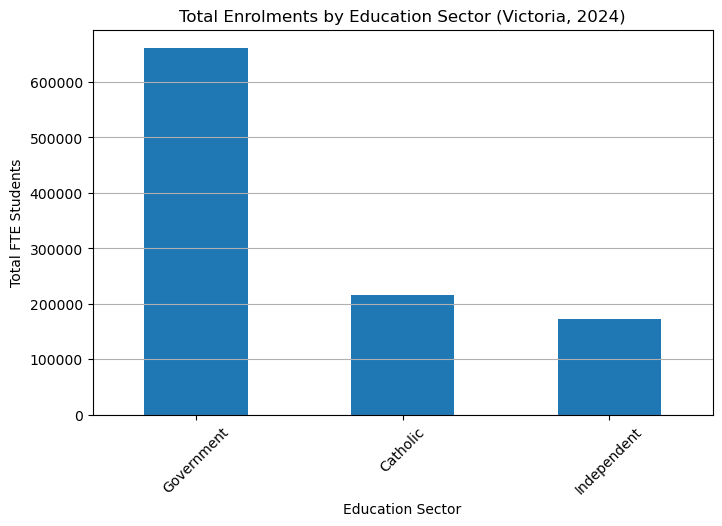

In [15]:
import matplotlib.pyplot as plt

# Group by Education Sector and sum Grand Total
sector_totals = df.groupby('Education_Sector')['Grand Total'].sum().sort_values(ascending=False)

# Plot
sector_totals.plot(kind='bar', figsize=(8,5))
plt.title('Total Enrolments by Education Sector (Victoria, 2024)')
plt.ylabel('Total FTE Students')
plt.xlabel('Education Sector')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Insight 1: Total Enrolments by Sector

- Government schools have the highest total enrolments, followed by Catholic and Independent schools.
- This indicates that government schools serve the largest portion of students in Victoria.

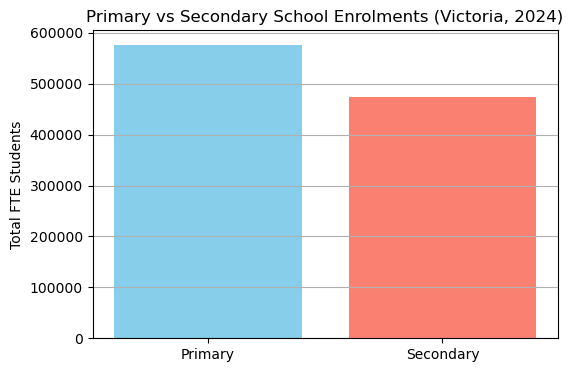

In [17]:
# Compare total Primary and Secondary Enrolments
primary_total = df['Primary Total'].sum()
secondary_total = df['Secondary Total'].sum()

# Data for plotting
levels = ['Primary', 'Secondary']
totals = [primary_total, secondary_total]

# Plot
plt.figure(figsize=(6,4))
plt.bar(levels, totals, color=['skyblue', 'salmon'])
plt.title('Primary vs Secondary School Enrolments (Victoria, 2024)')
plt.ylabel('Total FTE Students')
plt.grid(axis='y')
plt.show()


### Insight 2: Primary vs Secondary Enrolments

- Primary schools have a slightly higher number of total enrolments compared to secondary schools.
- This suggests a strong foundational education base in Victoria.

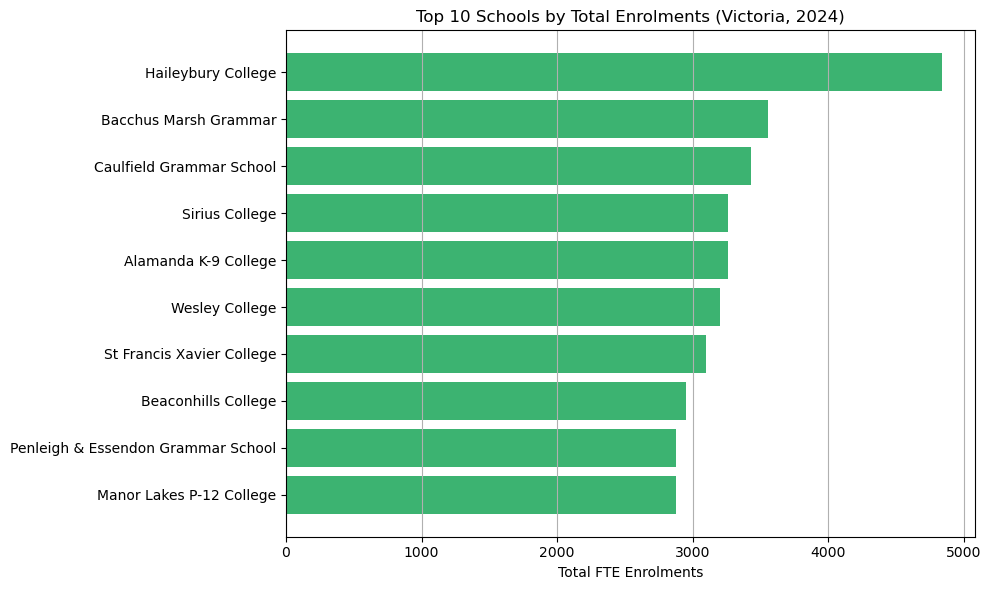

In [19]:
# Top 10 schools by Grand Total enrolments
top10_schools = df[['School_Name', 'Grand Total']].sort_values(by='Grand Total', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top10_schools['School_Name'], top10_schools['Grand Total'], color='mediumseagreen')
plt.xlabel('Total FTE Enrolments')
plt.title('Top 10 Schools by Total Enrolments (Victoria, 2024)')
plt.gca().invert_yaxis()  # Highest on top
plt.grid(axis='x')
plt.tight_layout()
plt.show()

### Insight 3: Top 10 Schools by Enrolment

- Haileybury College has the highest number of enrolments in Victoria in 2024.
- Most top schools are either large K-12 institutions or major secondary colleges.
- These schools play a major role in the education sector due to their massive student base.

In [21]:
# Total number of students
total_students = df['Grand Total'].sum()

# Average number of students per school
average_students = df['Grand Total'].mean()

# Average students in Primary and Secondary separately
primary_avg = df[df['School_Type'] == 'Primary']['Grand Total'].mean()
secondary_avg = df[df['School_Type'] == 'Secondary']['Grand Total'].mean()

print(f"Total number of students in Victoria (2024): {total_students:.0f}")
print(f"Average number of students per school: {average_students:.1f}")
print(f"Average Primary School size: {primary_avg:.1f}")
print(f"Average Secondary School size: {secondary_avg:.1f}")


Total number of students in Victoria (2024): 1049890
Average number of students per school: 457.5
Average Primary School size: 297.8
Average Secondary School size: 914.3


### Insight 4: State-wide Enrolment Summary

- Victoria had approximately 1,049,890 students enrolled in 2024.
- On average, each school had around 457.5 students.
- Primary schools are generally smaller, averaging 297.8 students, while secondary schools had an average of 914.3 students.

## Conclusion

This project provided key insights into school enrolments across Victoria in 2024.  
We observed that enrolments are concentrated heavily in a few major schools, and secondary schools tend to have larger populations than primary schools.  
These insights can support education planning, resource allocation, and further analysis of regional trends.
